In [1]:
import pandas as pd

# After executing the "Wrangling" code for my capstone, the following df will be stored locally as 'FEMA.csv'
file = "dataset/preprocessed/FEMA.csv"
dates = ['declarationDate','incidentBeginDate','incidentEndDate']

df = pd.read_csv(file, index_col = ['disasterNumber', 'zipCode', 'city'], parse_dates = dates, low_memory = False)

file2 = "dataset/preprocessed/aggregate_FEMA.csv"
agg_df = agg_df = pd.read_csv(file2, index_col = ['disasterNumber'], parse_dates = dates, low_memory = False)

In [3]:
dn_list = agg_df.index
zip_counts = []
for dn in dn_list:
    a = df.reset_index().set_index('disasterNumber').loc[dn,:]
    count = len(pd.Series(a.zipCode).unique())
    zip_counts.append(count)

In [4]:
agg_df['zip_counts'] = zip_counts

In [5]:
agg_df.loc[:,['zip_counts','validRegistrations','totalInspected','approvedForFemaAssistance']].sort_values('zip_counts', ascending = False).head()

,zip_counts,validRegistrations,totalInspected,approvedForFemaAssistance
disasterNumber,,,,
4586,1586,408927,103439,60329
4337,1476,2623110,989894,774251
4485,1445,51965,0,42878
4482,1279,48038,0,38828
4834,1216,1047842,178632,252884


In [10]:
incident_list = agg_df.incidentType.unique()

inc_df_list = []
for inc in incident_list:
    inc_df = agg_df[agg_df['incidentType']==inc]
    inc_df_list.append(inc_df)
for incident, df in zip(incident_list, inc_df_list):
    print(str(incident) + ", disaster count : " + str(df.shape[0]))

Severe Storm, disaster count : 272
Earthquake, disaster count : 9
Typhoon, disaster count : 9
Severe Ice Storm, disaster count : 4
Hurricane, disaster count : 99
Tornado, disaster count : 22
Fire, disaster count : 25
Flood, disaster count : 70
Other, disaster count : 2
Mud/Landslide, disaster count : 2
Volcanic Eruption, disaster count : 1
Biological, disaster count : 56
Dam/Levee Break, disaster count : 1
Winter Storm, disaster count : 1
Tropical Storm, disaster count : 8


In [11]:
program_list = ['ihProgramDeclared', 'iaProgramDeclared', 'paProgramDeclared', 'hmProgramDeclared']

p_df_list = []
for program in program_list:
    p_df = agg_df[agg_df[program]==1]
    p_df_list.append(p_df)

for program, df in zip(program_list, p_df_list):
    print(str(program) + ", disaster count : " + str(df.shape[0]))

ihProgramDeclared, disaster count : 241
iaProgramDeclared, disaster count : 87
paProgramDeclared, disaster count : 451
hmProgramDeclared, disaster count : 541


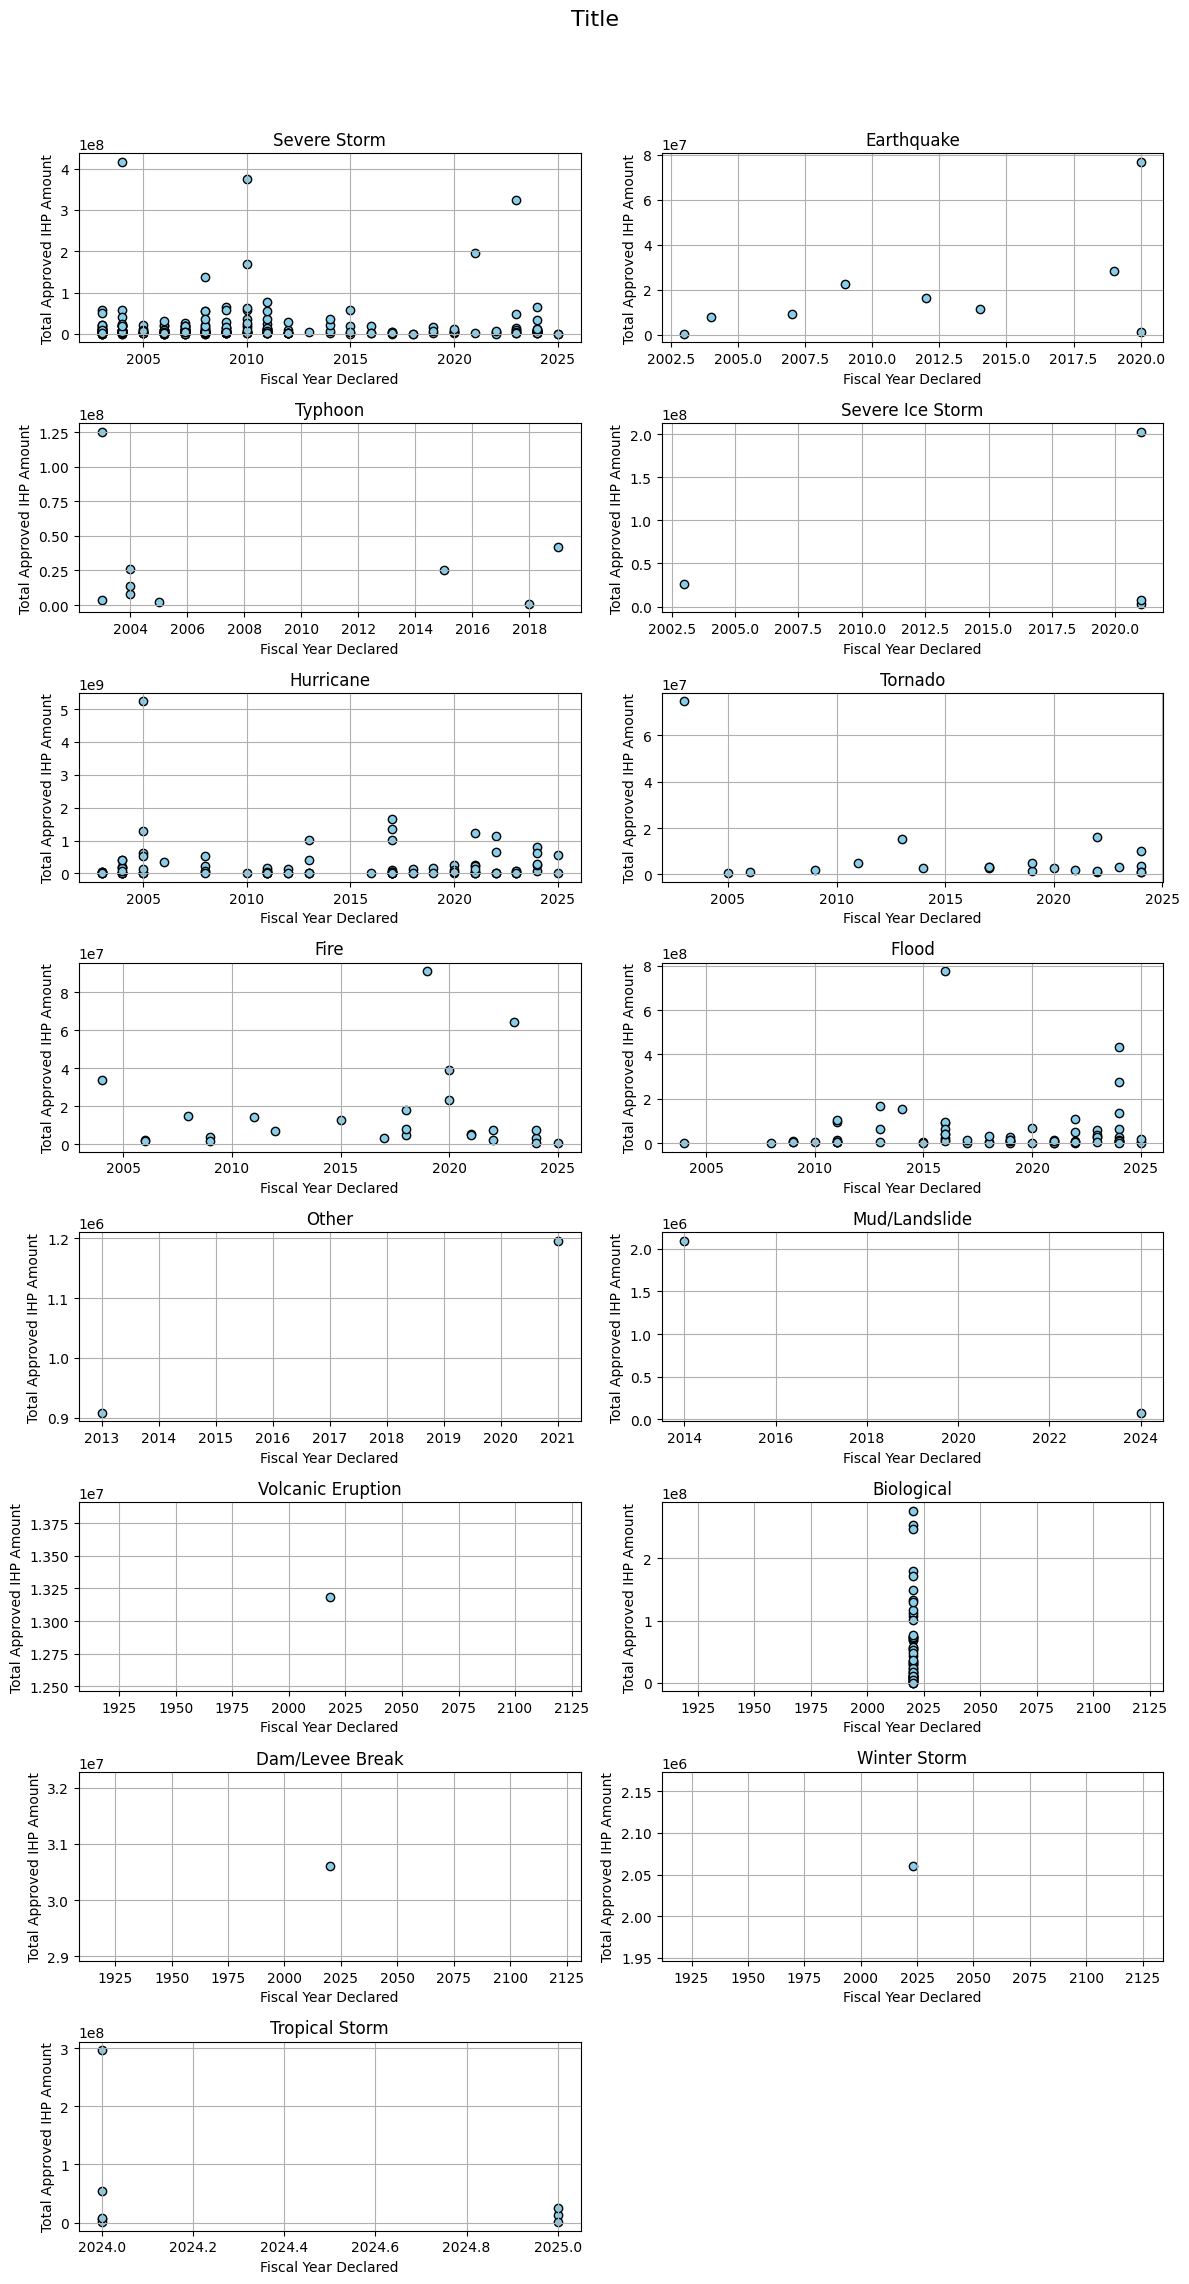

In [16]:
import matplotlib.pyplot as plt

x = 'fyDeclared'
y = 'totalApprovedIhpAmount'

a, b = inc_df_list, incident_list

plt.figure(figsize=(12, 24))

for i, (j, k) in enumerate(zip(a, b), start=1):
    plt.subplot(8, 2, i)
    plt.scatter(x=j[x], y=j[y], color='skyblue', edgecolor='black')
    plt.title(k)
    plt.xlabel('Fiscal Year Declared')
    plt.ylabel('Total Approved IHP Amount')
    plt.grid(True)

plt.suptitle('Title', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [18]:
agg_df.columns

Index(['declarationDate', 'fyDeclared', 'declarationType', 'incidentType',
       'declarationTitle', 'ihProgramDeclared', 'iaProgramDeclared',
       'paProgramDeclared', 'hmProgramDeclared', 'incidentBeginDate',
       'incidentEndDate', 'disasterCloseoutDate', 'disasterLength',
       'validRegistrations', 'averageFemaInspectedDamage', 'totalInspected',
       'totalDamage', 'noFemaInspectedDamage',
       'femaInspectedDamageBetween1And10000',
       'femaInspectedDamageBetween10001And20000',
       'femaInspectedDamageBetween20001And30000',
       'femaInspectedDamageGreaterThan30000', 'approvedForFemaAssistance',
       'totalApprovedIhpAmount', 'repairReplaceAmount', 'rentalAmount',
       'otherNeedsAmount', 'approvedBetween1And10000',
       'approvedBetween10001And25000', 'approvedBetween25001AndMax',
       'totalMaxGrants', 'id', 'totalWithModerateDamage',
       'totalWithMajorDamage', 'totalWithSubstantialDamage', 'zip_counts'],
      dtype='object')

In [21]:
# important columns for checking correlation

corr_cols = agg_df.reset_index()[['disasterNumber','incidentType','fyDeclared','disasterLength','zip_counts',
                                  'totalApprovedIhpAmount','approvedForFemaAssistance']]

# last bit of data wrangling that needs to be done (unescapable)

corr_cols['disasterLength'] = corr_cols['disasterLength'].str.extract('(\d+)').astype(float)

corr_cols = corr_cols.rename(columns = {'disasterLength':'length',
                                        'totalApprovedIhpAmount':'apprAmount',
                                        'approvedForFemaAssistance':'apprIndv'})

corr_cols = corr_cols.set_index('disasterNumber')

In [22]:
corr_cols.sort_values('zip_counts', ascending = False).head()

,incidentType,fyDeclared,length,zip_counts,apprAmount,apprIndv
disasterNumber,,,,,,
4586,Severe Ice Storm,2021,10.0,1586,2.029429e+08,60329
4337,Hurricane,2017,44.0,1476,1.020688e+09,774251
4485,Biological,2020,1207.0,1445,2.768208e+08,42878
4482,Biological,2020,1207.0,1279,2.465884e+08,38828
4834,Hurricane,2025,28.0,1216,5.573006e+08,252884


In [28]:
corr_cols['length'].describe()

count     581.000000
mean      134.462995
std       351.623443
min         0.000000
25%         3.000000
50%        13.000000
75%        35.000000
max      1207.000000
Name: length, dtype: float64

In [29]:
median = 12

# median disaster length is 12 days, so we can divide disasters in short and long around 12

short = corr_cols[corr_cols['length'] <= median]
long = corr_cols[corr_cols['length'] > median]

s_count = short.shape[0]
l_count = long.shape[0]

print("Number of short disasters : ", s_count)
print("Number of long disasters : ", l_count)

Number of short disasters :  290
Number of long disasters :  291


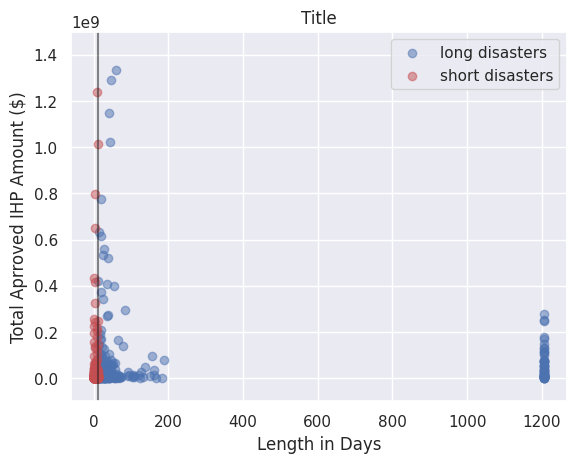

In [37]:
import seaborn as sns

sns.set()
plt.scatter(long['length'], long['apprAmount'], c='b', label="long disasters", alpha=0.5)

plt.scatter(short['length'], short['apprAmount'], c='r', label="short disasters", alpha=0.5)
plt.axvline(x = 12, color = 'k', alpha = 0.5)


plt.ylim([-0.1e9,1.5e9])
plt.xlabel('Length in Days')
plt.ylabel('Total Aprroved IHP Amount ($)')
plt.title('Title')
plt.legend()